In [1]:
import numpy as np
import cv2
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering

import xlwings

import matplotlib.pyplot as plt

import opencvlib.view as view

im = cv2.imread(r'c:\development\python\EAST\test\bin\sa6.jpg')


In [2]:
#get my data
X = np.load('C:/development/python/EAST/test/bin/detections/sa6_clust.npy')
#centroids of each detection rect
centroids = np.hstack(( (X[:, 0:1] +  X[:, 2:3])/2, (X[:, 1:2] + X[:, 3:4])/2 ))
Xtl = X[:,[0,1, 4,5,6,7,8,9,10,11,12,13]]
Xss = StandardScaler().fit_transform(X)

In [3]:
X.shape

(323, 14)

Estimated number of clusters: 1
Estimated number of noise points: 24
Silhouette Coefficient: 0.495


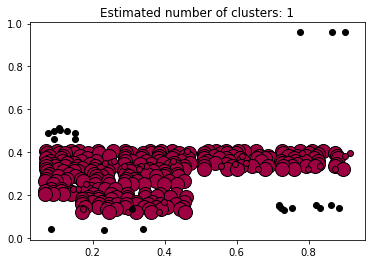

In [4]:
db = DBSCAN(eps=0.5, metric='cityblock', min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) #array of zeroes same shape as db.labels_
core_samples_mask[db.core_sample_indices_] = True #core samples
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask] #~ is numpy not
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


Estimated number of clusters: 7
Estimated number of noise points: 0
Silhouette Coefficient: 0.476


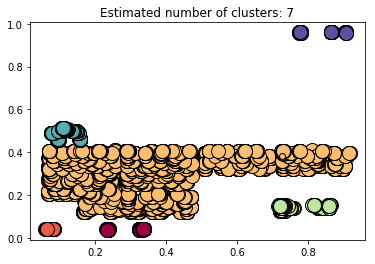

In [96]:
clustering = SpectralClustering(n_clusters=2, assign_labels='discretize',random_state=0).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool) #array of zeroes same shape as db.labels_
core_samples_mask[db.core_sample_indices_] = True #core samples
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask] #~ is numpy not
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 7
Estimated number of noise points: 0
Silhouette Coefficient: 0.476


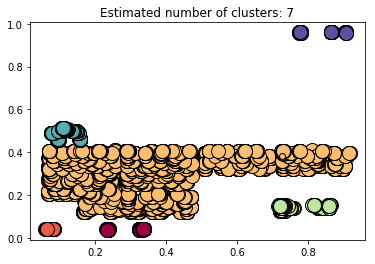

In [99]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool) #array of zeroes same shape as db.labels_
core_samples_mask[db.core_sample_indices_] = True #core samples
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask] #~ is numpy not
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [15]:
plt.show()

In [6]:
unique_labels

{-1, 0, 1, 2}

In [31]:
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

In [8]:
list(zip(unique_labels, colors))

[(0, (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)),
 (1, (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0)),
 (2, (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0)),
 (-1, (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0))]

In [30]:
class_member_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [32]:
la

array([0, 0, 0, ..., 6, 6, 6], dtype=int64)

array([[0.39963724, 0.04418472],
       [0.39782346, 0.04432725],
       [0.39721886, 0.04432725],
       ...,
       [0.81539702, 0.96322691],
       [0.81600161, 0.96322691],
       [0.81539702, 0.96336944]])

In [36]:
X[0:1, 1:2] + X[0:1, 3:4]/

array([[0.08836944]])

In [37]:
X[0:1, ...]

array([[0.33252721, 0.03791334, 0.46674728, 0.0504561 , 0.01254276,
        0.67336442, 0.10163215, 0.22500343, 0.00199115, 0.8219764 ,
        0.17603245, 0.        , 0.1642828 , 0.8357172 ]])

In [38]:
0.0504561 + 0.03791334

0.08836944